#Titanic: kaggle Competition

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


In [2]:
titanic_train_df = pd.read_csv("train.csv", delimiter=',')
titanic_test_df = pd.read_csv("test.csv", delimiter=',')


titanic_train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Total passengers in training set: {}".format(len(titanic_train_df.index)))

Total passengers in training set: 891


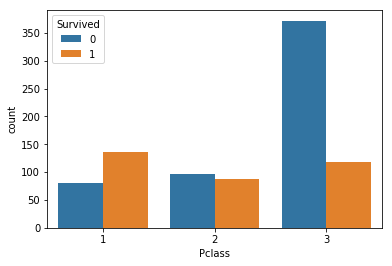

In [4]:
sns.countplot(x="Pclass", hue="Survived", data = titanic_train_df)

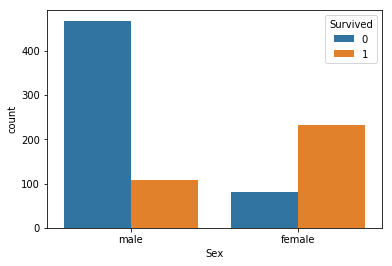

In [5]:
sns.countplot(x="Sex", hue='Survived', data= titanic_train_df )

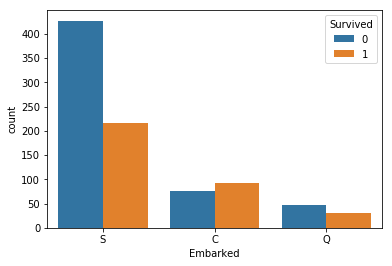

In [6]:
sns.countplot(x='Embarked', hue='Survived', data = titanic_train_df)

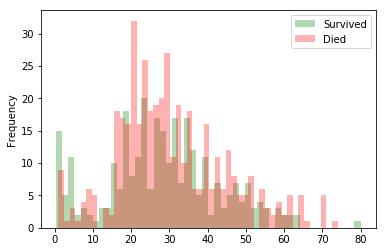

In [7]:
# Now let's look at the age columns, and since age is continuous variable, lets use histogram.

survived = titanic_train_df[titanic_train_df['Survived'] == 1]
not_survived = titanic_train_df[titanic_train_df['Survived'] == 0]

survived['Age'].plot.hist(alpha=0.3, color='green', bins = 50)
not_survived['Age'].plot.hist(alpha=0.3, color='red', bins = 50)

plt.legend(['Survived','Died'])
plt.show()

In [8]:
# lets check Name feature. As every name has a title

titanic_train_df['Title'] = [ x.split(',')[1].split('.')[0] for x in titanic_train_df['Name']]
titanic_test_df['Title'] = [ x.split(',')[1].split('.')[0] for x in titanic_test_df['Name']]

titanic_train_df['Title'] = titanic_train_df['Title'].str.strip()
titanic_test_df['Title'] = titanic_test_df['Title'].str.strip()

set(np.concatenate([titanic_train_df['Title'].unique(), titanic_test_df['Title'].unique()], axis=0))

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

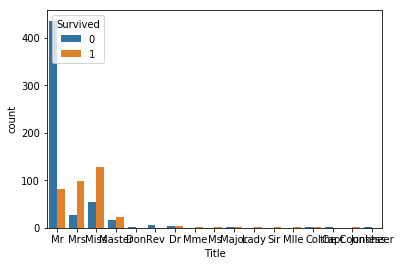

In [9]:
sns.countplot(x= 'Title', hue='Survived', data = titanic_train_df)

In [10]:
#Now lets check data 

titanic_train_df.isnull().sum() , titanic_test_df.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 Title            0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 Title            0
 dtype: int64)

In [11]:
titanic_combined = pd.concat([titanic_train_df.drop('Survived', axis=1), titanic_test_df], axis=0)
title_mean_age = titanic_combined.groupby(['Title', 'Sex', 'Pclass']).mean().reset_index()[['Title', 'Sex', 'Pclass', 'Age']]
title_mean_age.head()

,Title,Sex,Pclass,Age
0,Capt,male,1,70.0
1,Col,male,1,54.0
2,Don,male,1,40.0
3,Dona,female,1,39.0
4,Dr,female,1,49.0


In [12]:

def missing_age(row):
  check = (title_mean_age['Sex'] ==  row['Sex']) & (title_mean_age['Pclass'] == row['Pclass']) \
          & (title_mean_age['Title']==row['Title'])
  
  return title_mean_age[check]['Age'].values[0]

titanic_train_df['Age'] = titanic_train_df.apply(lambda row: missing_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
titanic_test_df['Age'] = titanic_test_df.apply(lambda row: missing_age(row) if np.isnan(row['Age']) else row['Age'], axis=1) 

titanic_train_df['Age'].isnull().sum(), titanic_test_df['Age'].isnull().sum()

(0, 1)

In [13]:
titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean(), inplace=True)
                             
titanic_test_df['Age'].isnull().sum()         

0

In [14]:
def group_age(data):
  data['Age'].astype('float32')
  cut_points = [0,5,12,18,35,60,100]
  label_names = ["Infant","Child","Teenager","Young","Adult","Senior"]
  #data["Age"] = data["Age"].fillna(-0.5)
  data["Age_group"] = pd.cut(data["Age"],cut_points,labels=label_names)
  return data

titanic_train = group_age(titanic_train_df)
titanic_test = group_age(titanic_test_df)

titanic_train['Age_group'].unique(), titanic_test['Age_group'].unique()

([Young, Adult, Infant, Teenager, Child, Senior]
 Categories (6, object): [Infant < Child < Teenager < Young < Adult < Senior],
 [Young, Adult, Senior, Teenager, Child, Infant]
 Categories (6, object): [Infant < Child < Teenager < Young < Adult < Senior])

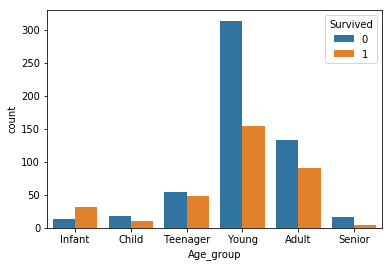

In [15]:
sns.countplot(x='Age_group', hue='Survived', data = titanic_train)

In [16]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode().values[0], inplace = True)

titanic_test['Fare'].fillna(titanic_combined['Fare'].mean(), inplace=True)
titanic_train['Fare'].fillna(titanic_combined['Fare'].mean(), inplace=True)

titanic_train.isnull().sum(), titanic_test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 Title            0
 Age_group        0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 Title            0
 Age_group        0
 dtype: int64)

In [17]:
#let's check cabin
cabin_train = [x[0] for x in titanic_train[~titanic_train['Cabin'].isnull()]['Cabin']]
cabin_test = [x[0] for x in titanic_test[~titanic_test['Cabin'].isnull()]['Cabin']]

set(cabin_train), set(cabin_test)

({'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}, {'A', 'B', 'C', 'D', 'E', 'F', 'G'})

In [18]:
#fill unknown cabin information with U:unknown

titanic_train['Cabin'].fillna('U', inplace = True)
titanic_train['Cabin'] = [x[0] for x in titanic_train['Cabin']]

titanic_test['Cabin'].fillna('U', inplace = True)
titanic_test['Cabin'] = [x[0] for x in titanic_test['Cabin']]

titanic_train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
#Merge SibSp and Parch in one feature
def family_size(data):
  d = data['Parch']+data['SibSp']+1
  return d

titanic_train['FamilySize'] = family_size(titanic_train[['Parch', 'SibSp']])
titanic_test['FamilySize'] = family_size(titanic_test[['Parch', 'SibSp']])

titanic_train['FamilySize'].describe(), titanic_test['FamilySize'].describe()


(count    891.000000
 mean       1.904602
 std        1.613459
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max       11.000000
 Name: FamilySize, dtype: float64, count    418.000000
 mean       1.839713
 std        1.519072
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max       11.000000
 Name: FamilySize, dtype: float64)

In [20]:
def group_family(data):
  data['FamilySize'].astype('float32')
  cut_points = [0,1,2,3,15]
  label_names = ["Single","Couple","Small","Large"]
  #data["Age"] = data["Age"].fillna(-0.5)
  data["Family"] = pd.cut(data["FamilySize"],cut_points,labels=label_names)
  return data

titanic_train = group_family(titanic_train)
titanic_test = group_family(titanic_test)

titanic_train['Family'].unique(), titanic_test['Family'].unique()

([Couple, Single, Large, Small]
 Categories (4, object): [Single < Couple < Small < Large],
 [Single, Couple, Small, Large]
 Categories (4, object): [Single < Couple < Small < Large])

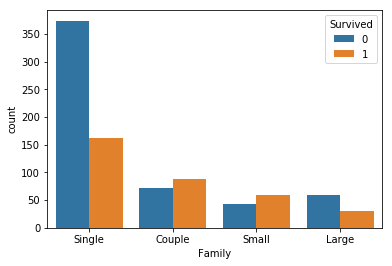

In [21]:
sns.countplot(x='Family', hue='Survived', data = titanic_train)

In [0]:

titanic_train['Fare'] = titanic_train['Fare'] / float(titanic_combined['Fare'].max())
titanic_test['Fare'] = titanic_test['Fare'] / float(titanic_combined['Fare'].max())


#titanic_train['Parch'] = titanic_train['Parch'] / float(titanic_combined['Parch'].max())
#titanic_test['Parch'] = titanic_test['Parch'] / float(titanic_combined['Parch'].max())


#titanic_train['SibSp'] = titanic_train['SibSp'] / float(titanic_combined['SibSp'].max())
#titanic_test['SibSp'] = titanic_test['SibSp'] / float(titanic_combined['SibSp'].max())

In [0]:
sex = pd.get_dummies(titanic_train['Sex'], prefix = 'Sex')
embark = pd.get_dummies(titanic_train['Embarked'], prefix = 'Em')
Pclass = pd.get_dummies(titanic_train['Pclass'], prefix = 'Pclass')
Title = pd.get_dummies(titanic_train['Title'], prefix = 'Title')
Cabin = pd.get_dummies(titanic_train['Cabin'], prefix = 'Cabin')
#Parch = pd.get_dummies(titanic_train['Parch'], prefix = 'Parch')
#SibSp = pd.get_dummies(titanic_train['SibSp'], prefix = 'SibSp')
age = pd.get_dummies(titanic_train['Age_group'], prefix = 'Age')
family = pd.get_dummies(titanic_train['Family'], prefix = 'F')
# test set

sex_test = pd.get_dummies(titanic_test['Sex'], prefix = 'Sex')
embark_test = pd.get_dummies(titanic_test['Embarked'], prefix = 'Em')
Pclass_test = pd.get_dummies(titanic_test['Pclass'], prefix = 'Pclass')
Title_test = pd.get_dummies(titanic_test['Title'], prefix = 'Title')
Cabin_test = pd.get_dummies(titanic_test['Cabin'], prefix = 'Cabin')
#Parch_test = pd.get_dummies(titanic_test['Parch'], prefix = 'Parch')
#SibSp_test = pd.get_dummies(titanic_test['SibSp'], prefix = 'SibSp')
age_test = pd.get_dummies(titanic_test['Age_group'], prefix = 'Age')
family_test = pd.get_dummies(titanic_test['Family'], prefix = 'F')

In [0]:
#titanic_data = pd.concat([titanic_train, sex, embark, Pclass, age, Parch, SibSp], axis=1)
#titanic_data_test = pd.concat([titanic_test, sex_test, embark_test, Pclass_test, age_test, Parch_test, SibSp_test], axis=1)



titanic_data = pd.concat([titanic_train, sex, embark, Pclass, age, Title, Cabin, family], axis=1)
titanic_data_test = pd.concat([titanic_test, sex_test, embark_test, Pclass_test, age_test, Title_test, Cabin_test, family_test], axis=1)


In [0]:
titanic_data.drop(['Ticket', 'Name', 'Age'],axis =1, inplace=True) #not relevent to the survival
titanic_data.drop(['Sex', 'Embarked', 'Pclass', 'Age_group', 'Cabin', 'Title', 'FamilySize', 'Family', 'Parch', 'SibSp'], axis = 1, inplace=True) #already modified



titanic_data_test.drop(['Ticket', 'Name', 'Age'],axis = 1, inplace=True) #not relevent to the survival
titanic_data_test.drop(['Sex', 'Embarked', 'Pclass', 'Age_group', 'Cabin', 'Title',  'FamilySize', 'Family', 'Parch', 'SibSp'], axis = 1, inplace=True)#already modified



In [26]:
titanic_data.columns , titanic_data_test.columns

(Index(['PassengerId', 'Survived', 'Fare', 'Sex_female', 'Sex_male', 'Em_C',
        'Em_Q', 'Em_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Infant',
        'Age_Child', 'Age_Teenager', 'Age_Young', 'Age_Adult', 'Age_Senior',
        'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
        'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
        'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
        'Title_Sir', 'Title_the Countess', 'Cabin_A', 'Cabin_B', 'Cabin_C',
        'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U',
        'F_Single', 'F_Couple', 'F_Small', 'F_Large'],
       dtype='object'),
 Index(['PassengerId', 'Fare', 'Sex_female', 'Sex_male', 'Em_C', 'Em_Q', 'Em_S',
        'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Infant', 'Age_Child',
        'Age_Teenager', 'Age_Young', 'Age_Adult', 'Age_Senior', 'Title_Col',
        'Title_Dona', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
        

In [0]:
X_train = titanic_data.drop(['Survived', 'PassengerId'], axis=1)
Y_train = titanic_data['Survived']

X_test = titanic_data_test.drop('PassengerId', axis=1)

In [28]:
X_train.shape, X_test.shape

((891, 45), (418, 36))

In [29]:
X_train.head()

,Fare,Sex_female,Sex_male,Em_C,Em_Q,Em_S,Pclass_1,Pclass_2,Pclass_3,Age_Infant,Age_Child,Age_Teenager,Age_Young,Age_Adult,Age_Senior,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,F_Single,F_Couple,F_Small,F_Large
0,0.014151,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.139136,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.015469,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0.103644,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.015713,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [30]:
cols = list(X_train.columns)

for x in cols:
  if x not in X_test.columns:
    X_test[x] = 0
    
X_test = X_test[cols]

X_test.fillna(0, inplace=True)

X_train.shape, X_test.shape


((891, 45), (418, 45))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

accuracy = {}

In [32]:
#Parameter tuning for logistics regression

from sklearn.model_selection import GridSearchCV

grid={
    "C":[0.001, 0.01, 0.1, 1, 10, 100], "max_iter": [100, 130, 150, 200], 
     "penalty": ['l1', 'l2']
      }
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, verbose=0)
logreg_cv.fit(X_train,Y_train)
accuracy['LR'] = round(logreg_cv.best_score_ * 100, 2)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
accuracy : 0.8237934904601572


In [33]:
grid={
    "max_depth":[4, 6, 8, 10], "n_estimators": [10, 50, 70, 100], 
     "max_features": ['sqrt', 'log2', 'auto'], "bootstrap": [True, False],
      "min_samples_split":[2, 3, 7, 10], "min_samples_leaf" : [3, 5, 7, 10]
      }
ranfor=RandomForestClassifier()
ranfor_cv=GridSearchCV(ranfor,grid,cv=10)
ranfor_cv.fit(X_train,Y_train)
accuracy['RF'] = round(ranfor_cv.best_score_ * 100, 2)
print("tuned hpyerparameters :(best parameters) ",ranfor_cv.best_params_)
print("accuracy :",ranfor_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
accuracy : 0.8383838383838383


In [34]:



grid=[{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
      'C': [0.001, 0.10, 0.1]},
      {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4],
      'C': [0.001, 0.10, 0.1]},
       {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1]}
       ]

svc=SVC()
svc_cv=GridSearchCV(svc,grid,cv=10)
svc_cv.fit(X_train,Y_train)
accuracy['SVC'] = round(svc_cv.best_score_* 100, 2)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'kernel': 'linear'}
accuracy : 0.813692480359147


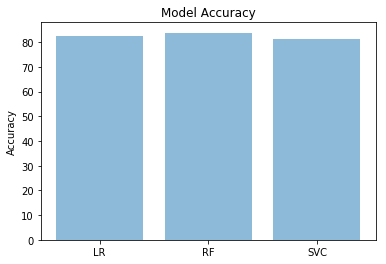

In [35]:
y_pos = np.arange(len(accuracy.keys()))
plt.bar(y_pos, accuracy.values(), align='center', alpha=0.5)
plt.xticks(y_pos, accuracy.keys())
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.show()

In [0]:
from sklearn import metrics

model_LR = LogisticRegression(C=0.1, max_iter=100, penalty='l2')
model_LR.fit(X_train, Y_train)
pred_LR = model_LR.predict(X_train)
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(Y_train, pred_LR)
auc_LR = metrics.auc(fpr_LR, tpr_LR,)

model_RF = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features = 'log2', min_samples_leaf = 3,
                                  min_samples_split = 3, n_estimators = 100)
model_RF.fit(X_train, Y_train)
pred_RF = model_RF.predict(X_train)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(Y_train, pred_RF)
auc_RF = metrics.auc(fpr_RF, tpr_RF,)

model_SVC = SVC(C = 0.1, kernel = 'linear')
model_SVC.fit(X_train, Y_train)
pred_SVC = model_SVC.predict(X_train)
fpr_SVC, tpr_SVC, thresholds_SVC = metrics.roc_curve(Y_train, pred_SVC)
auc_SVC = metrics.auc(fpr_SVC, tpr_SVC,)

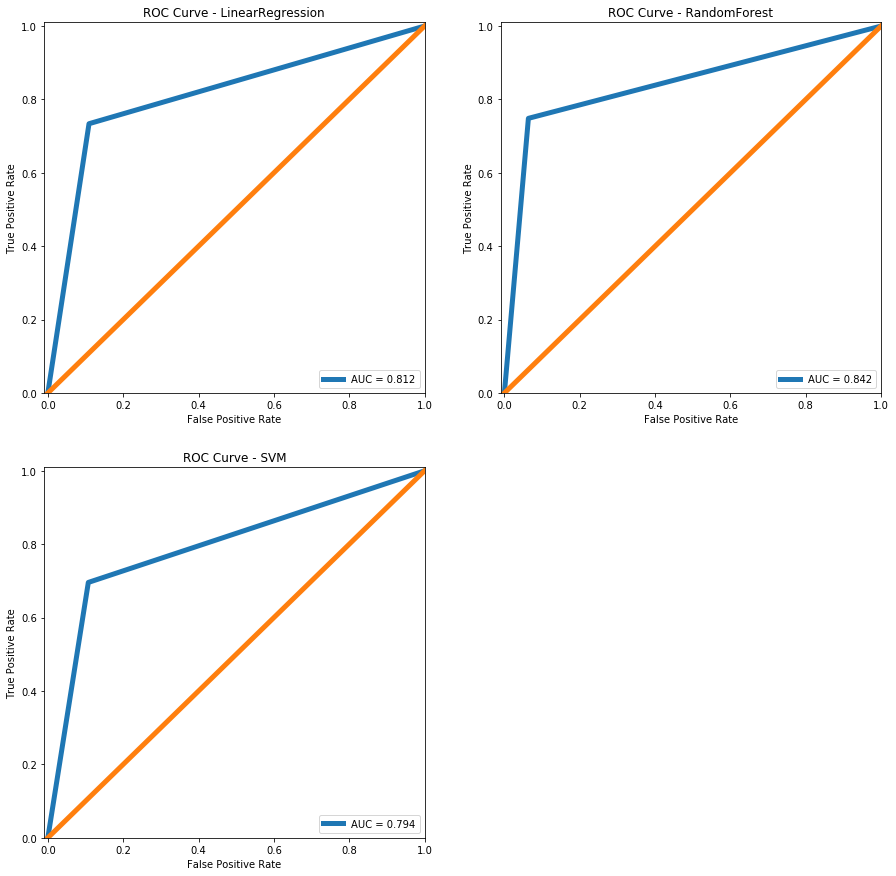

In [42]:
fig = plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.plot(fpr_LR, tpr_LR, linewidth=5, label='AUC = %0.3f'% auc_LR)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('ROC Curve - LinearRegression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2,2,2)
plt.plot(fpr_RF, tpr_RF, linewidth=5, label='AUC = %0.3f'% auc_RF)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('ROC Curve - RandomForest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2,2,3)
plt.plot(fpr_SVC, tpr_SVC, linewidth=5, label='AUC = %0.3f'% auc_SVC)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('ROC Curve - SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
# Randon Forest

predictions = model_RF.predict(X_test)

predictions = pd.Series(predictions,name="Survived")

passenger = titanic_test_df['PassengerId']

final_df = pd.concat([passenger, predictions], axis=1)

final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
final_df['Survived'].sum()

144

In [0]:
final_df.to_csv("submission_final.csv", index=False)